In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle

## Helps in visualization
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import statistics

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
## Gender Label Encoder

gender_label_encoder = LabelEncoder()
data['Gender'] = gender_label_encoder.fit_transform(data['Gender'])

## Geography One Hot Encoder

geo_onehot_encoder = OneHotEncoder(sparse= False)
geo_onehot_encoder_df = geo_onehot_encoder.fit_transform(data[['Geography']])
geo_onehot_encoder_df = pd.DataFrame(geo_onehot_encoder_df,columns = geo_onehot_encoder.get_feature_names(['Geography']))

## Concat with main data and drop extra colums
data = pd.concat([data,geo_onehot_encoder_df], axis=1)
data = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis= 1)


In [4]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [5]:
data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

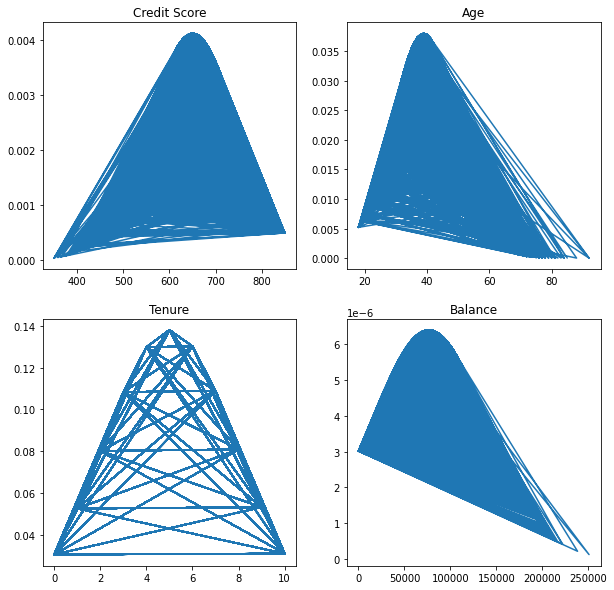

In [6]:
## Normal Distrbution to check the spread

fig,axis = plt.subplots(2,2, figsize= (10,10))

axis[0,0].plot(data['CreditScore'],
               norm.pdf(data['CreditScore'],
                        data.describe()['CreditScore']['mean'],
                        data.describe()['CreditScore']['std']))
axis[0,0].set_title('Credit Score')

axis[0,1].plot(data['Age'],
               norm.pdf(data['Age'],
                        data.describe()['Age']['mean'],
                        data.describe()['Age']['std']))
axis[0,1].set_title('Age')

axis[1,0].plot(data['Tenure'],
               norm.pdf(data['Tenure'],
                        data.describe()['Tenure']['mean'],
                        data.describe()['Tenure']['std']))
axis[1,0].set_title('Tenure')

axis[1,1].plot(data['Balance'],
               norm.pdf(data['Balance'],
                        data.describe()['Balance']['mean'],
                        data.describe()['Balance']['std']))
axis[1,1].set_title('Balance')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

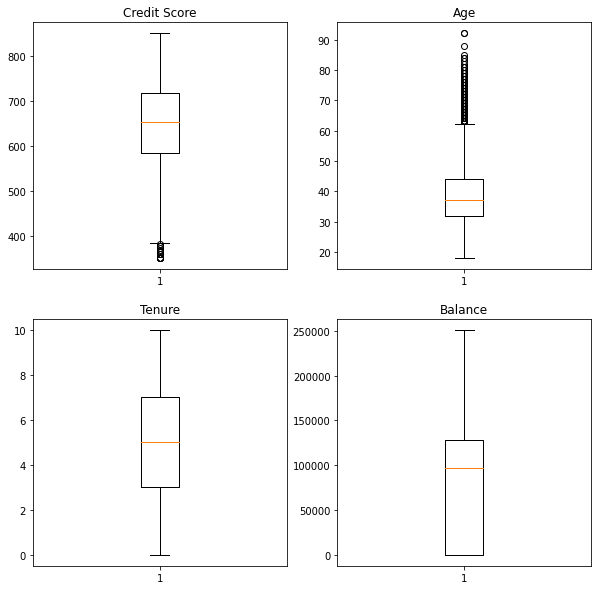

In [7]:
## Boxplot for outlier detection

fig,axis = plt.subplots(2,2, figsize=(10,10))

axis[0,0].boxplot(data['CreditScore'])
axis[0,0].set_title('Credit Score')

axis[0,1].boxplot(data['Age'])
axis[0,1].set_title('Age')

axis[1,0].boxplot(data['Tenure'])
axis[1,0].set_title('Tenure')

axis[1,1].boxplot(data['Balance'])
axis[1,1].set_title('Balance')

plt.show

In [8]:
## separate independent and dependent variable
y= data['EstimatedSalary']
x = data.drop(['EstimatedSalary'], axis= 1)

## Split data in train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 42,shuffle= True,test_size= 0.25)

In [9]:
## Scaling of independent variable
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

# Model Creation

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [18]:
## Model creation
model = Sequential([
    Dense(64, activation= 'relu', input_shape= (x_train.shape[1],)),
    Dense(32, activation= 'relu'),
    Dense(16, activation= 'relu'),
    Dense(1) ## regression
])

opt = tf.keras.optimizers.Adam(learning_rate= 0.01)
losss = tf.keras.losses.MAE

## Compile model
model.compile(optimizer= opt, loss= losss, metrics= ['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [19]:
## This is how we are going to log our model training
log_dir = 'logs/fit' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

## Histogram_freq= 1 will enable visualization on each epoch
## The path of the directory where to save the log files to be parsed by TensorBoard
tensorflow_callback = TensorBoard(log_dir= log_dir, histogram_freq= 1)

early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience= 10, restore_best_weights= True)

In [27]:
## Train the model

history= model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 100, callbacks= [tensorflow_callback, early_stopping_callback])

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 49962.0781 - mae: 49962.0781 - val_loss: 49914.6797 - val_mae: 49914.6797
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 49827.6133 - mae: 49827.6133 - val_loss: 50044.3789 - val_mae: 50044.3789
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 49770.4648 - mae: 49770.4648 - val_loss: 49666.0742 - val_mae: 49666.0742
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 49825.6016 - mae: 49825.6016 - val_loss: 49681.6875 - val_mae: 49681.6875
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 49866.3945 - mae: 49866.3945 - val_loss: 49718.1562 - val_mae: 49718.1562
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 49809.7773 - mae: 49809.7773 - val_loss: 50393.1914 - val_mae: 50393.1914
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 49782.3438 - mae: 49782.3438 - 

In [22]:
%load_ext tensorboard


%tensorboard --logdir=logs/fit20240924-211657


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 15896), started 0:03:04 ago. (Use '!kill 15896' to kill it.)

Text(0.5, 1.0, 'Validation Accuracy Error')

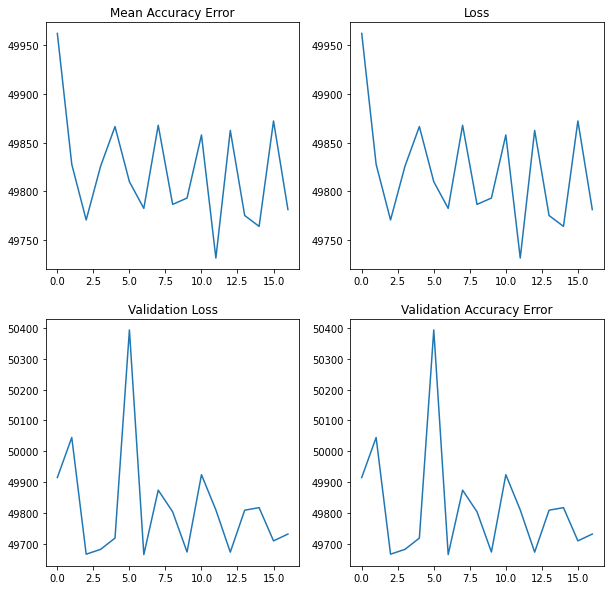

In [31]:
# Looking at difference charts to understand performance of model

history.history.keys()

fig2,axis2 = plt.subplots(2,2, figsize = (10,10))

axis2[0,0].plot(history.history['mae'])
axis2[0,0].set_title('Mean Accuracy Error')
axis2[0,1].plot(history.history['loss'])
axis2[0,1].set_title('Loss')
axis2[1,0].plot(history.history['val_loss'])
axis2[1,0].set_title('Validation Loss')
axis2[1,1].plot(history.history['val_mae'])
axis2[1,1].set_title('Validation Accuracy Error')

In [33]:
## Evaluate model on the test data
test_loss, test_mae=  model.evaluate(x_test,y_test)
print(f'Test MAE : {test_mae}')

79/79 [==============================] - 0s 2ms/step - loss: 49664.8320 - mae: 49664.8320
Test MAE : 49664.83203125


In [35]:
model.save('regression_model.h5')